In [1]:
from __future__ import annotations

from helper import generate_heisenberg_observable_data, plot_error_vs_depth

Define parameters

In [2]:
J = 1
g = 0.5
dt = 0.1
num_qubits = 16
pad = 1

min_bond_dim = 2
max_bonds = [256]
thresholds = [0]
# max_bonds = [64]
timesteps_list = [1, 5, *range(10, 110, 10)]
timesteps_list = [*range(1, 11)]

In [ ]:
results = generate_heisenberg_observable_data(num_qubits, J, g, dt, pad, thresholds, max_bonds, timesteps_list, min_bond_dim)

TypeError: generate_heisenberg_observable_data() missing 1 required positional argument: 'min_bond_dim'

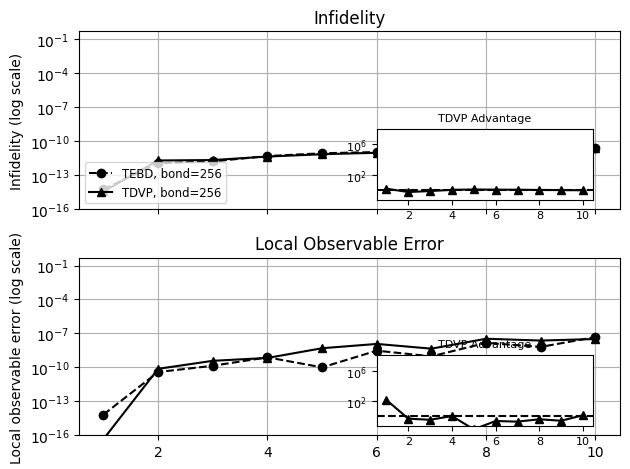

In [ ]:
plot_error_vs_depth(results, max_bonds)